# 💬 NLP with spaCy — Named Entity Recognition & Sentiment Analysis

**Goal:**  
Use spaCy to extract entities (like product names, people, organizations) and TextBlob for sentiment analysis on customer review text.

**Frameworks:**  
- spaCy (for NER)  
- TextBlob (for sentiment polarity)

**Steps:**
1. Load spaCy and TextBlob  
2. Run NER on a few sample reviews  
3. Analyze sentiment (positive, neutral, negative)  
4. Visualize results and save outputs  

In [1]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# Load small English model
nlp = spacy.load("en_core_web_sm")

# Ensure images folder exists
os.makedirs("images", exist_ok=True)

In [3]:
reviews = [
    "The new iPhone 15 has an amazing camera and battery life!",
    "I had a terrible experience with the Samsung support team.",
    "The laptop by Dell performs decently for the price.",
    "Amazon's delivery was super fast and reliable.",
    "The movie was boring and too long.",
    "The teacher explained AI concepts very clearly and kindly."
]

df = pd.DataFrame(reviews, columns=["review"])
df

,review
0,The new iPhone 15 has an amazing camera and ba...
1,I had a terrible experience with the Samsung s...
2,The laptop by Dell performs decently for the p...
3,Amazon's delivery was super fast and reliable.
4,The movie was boring and too long.
5,The teacher explained AI concepts very clearly...


In [4]:
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df["entities"] = df["review"].apply(extract_entities)
df

,review,entities
0,The new iPhone 15 has an amazing camera and ba...,[]
1,I had a terrible experience with the Samsung s...,"[(Samsung, ORG)]"
2,The laptop by Dell performs decently for the p...,"[(Dell, ORG)]"
3,Amazon's delivery was super fast and reliable.,"[(Amazon, ORG)]"
4,The movie was boring and too long.,[]
5,The teacher explained AI concepts very clearly...,"[(AI, ORG)]"


In [5]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df["sentiment_score"] = df["review"].apply(get_sentiment)

def label_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment_score"].apply(label_sentiment)
df

,review,entities,sentiment_score,sentiment_label
0,The new iPhone 15 has an amazing camera and ba...,[],0.443182,Positive
1,I had a terrible experience with the Samsung s...,"[(Samsung, ORG)]",-1.000000,Negative
2,The laptop by Dell performs decently for the p...,"[(Dell, ORG)]",0.166667,Positive
3,Amazon's delivery was super fast and reliable.,"[(Amazon, ORG)]",0.266667,Positive
4,The movie was boring and too long.,[],-0.525000,Negative
5,The teacher explained AI concepts very clearly...,"[(AI, ORG)]",0.365000,Positive


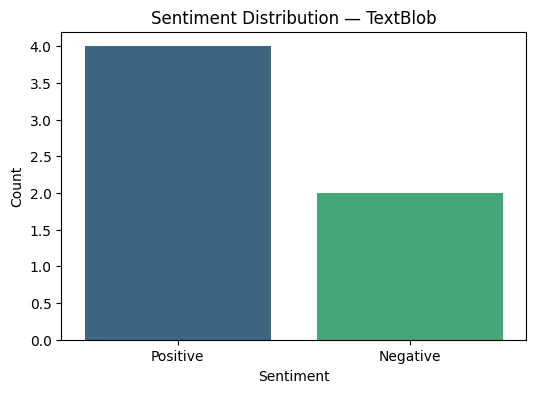

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x="sentiment_label", hue="sentiment_label", data=df, palette="viridis", legend=False)
plt.title("Sentiment Distribution — TextBlob")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.savefig("images/spacy_sentiment_distribution.png", bbox_inches='tight')
plt.show()

In [7]:
for i, row in df.iterrows():
    print(f"\nReview {i+1}: {row['review']}")
    print(f"Entities: {row['entities']}")
    print(f"Sentiment: {row['sentiment_label']} ({row['sentiment_score']:.2f})")


Review 1: The new iPhone 15 has an amazing camera and battery life!
Entities: []
Sentiment: Positive (0.44)

Review 2: I had a terrible experience with the Samsung support team.
Entities: [('Samsung', 'ORG')]
Sentiment: Negative (-1.00)

Review 3: The laptop by Dell performs decently for the price.
Entities: [('Dell', 'ORG')]
Sentiment: Positive (0.17)

Review 4: Amazon's delivery was super fast and reliable.
Entities: [('Amazon', 'ORG')]
Sentiment: Positive (0.27)

Review 5: The movie was boring and too long.
Entities: []
Sentiment: Negative (-0.53)

Review 6: The teacher explained AI concepts very clearly and kindly.
Entities: [('AI', 'ORG')]
Sentiment: Positive (0.36)


In [11]:
# Visualize NER for one example
from spacy import displacy
import warnings

sample_text = next((r for r in reviews if len(nlp(r).ents) > 0), reviews[0])
doc = nlp(sample_text)

html = displacy.render(doc, style="ent", jupyter=False)
with open("images/spacy_ner_example.html", "w", encoding="utf-8") as f:
    f.write(html)

print("✅ NER visualization saved to images/spacy_ner_example.html")

✅ NER visualization saved to images/spacy_ner_example.html


## ✅ Summary

- **Frameworks:** spaCy (NER) & TextBlob (Sentiment Analysis)  
- **Dataset:** 6 sample customer reviews  
- **Tasks:**
  - Extracted entities (products, brands, etc.)  
  - Calculated sentiment polarity  
- **Results:**
  - spaCy correctly identified named entities.
  - TextBlob labeled sentiment as Positive / Neutral / Negative.
- **Saved outputs:**
  - `spacy_sentiment_distribution.png`
  - `spacy_ner_example.html`